# 18.303 Numerical Stability of Finite-Differences

This notebook examines the numerical stability of a few common finite-difference schemes for the heat, transport, and wave equations. Execute the following code to import some useful linear algebra and plotting utilities used below.

In [1]:
using LinearAlgebra
using Plots

## Heat Equation

The heat equation on a periodic interval $[-1,1)$ with diffusivity constant $\gamma$ and initial condition $g(x)$ is given by

$$
\partial_t u(x,t) = \gamma\partial_x^2 u(x,t), \qquad u(x,0) = g(x),
$$

where $u$ and its derivatives are $2$-periodic in $x$. We illustrate the stability properties of the forward and backward Euler schemes. 

### Forward Euler

If we combine a forward first-order difference approximation in time with a central second-order difference approximation in space, then the approximate solution on our computational grid of $n$ equispaced points, at time $t_{j+1}>t_j\geq t_0$ can be computed by (see Lecture 17 notes)
$$
u_{j+1} = (I+\sigma D)u_j, \qquad \text{where} \qquad \sigma = \frac{\gamma\Delta t}{(\Delta x)^2}.
$$
Here, $\Delta x$ is the grid spacing, $\Delta t = t_{j+1}-t_j$ is the time step, and $D$ is the periodic second-order centered difference matrix
$$
D
=
\begin{pmatrix}
-2 & 1 & & & 1 \\
1 & -2 & 1 & & \\
   &  \ddots & \ddots & \ddots & \\
   & & 1 & -2 & 1 \\
   1 & & & 1 & -2
\end{pmatrix}.
$$
In Lecture 17, we derived a condition for stability: $0\leq \sigma \leq 0.5$. Experiment with the code below to see!

In [2]:
## build differentiation matrix (0=>ones(n) puts length n vector of ones onto the main diagonal, 1=>ones(n-1) puts length n-1 vector of ones onto the first superdiagonal)
function fdiff2C2(n)
    D = diagm(-1 => ones(n-1), 0 => -2*ones(n), 1 => ones(n-1))
    D[end,1] = 1
    D[1,end] = 1
    return D
end

# 12 x 12 second-order centered difference matrix
fdiff2C2(12)

12×12 Matrix{Float64}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

0.5

┌ Info: Saved animation to C:\Users\phros\AppData\Local\Temp\jl_bAtqjrrzyy.gif
└ @ Plots C:\Users\phros\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\phros\\AppData\\Local\\Temp\\jl_bAtqjrrzyy.gif")
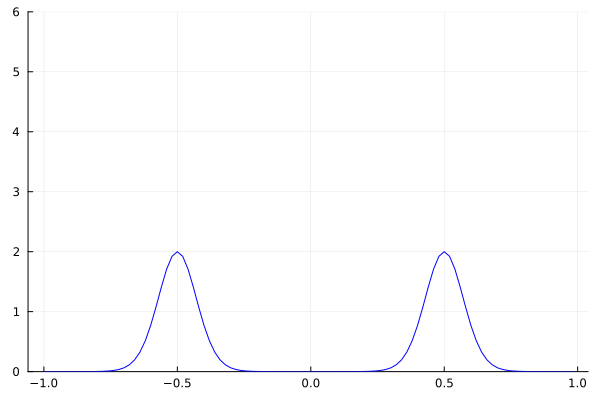

In [20]:
# computational grid = periodic interval [0, 1)
n = 100
Δx = 2/n
xgrid = LinRange(-1,1-Δx,n)

# spatial discretization
D = fdiff2C2(n)             # second partial derivative with respect to spatial variable
γ = 0.1                     # diffusivity

# time stepping (step forward in time with time-step h_t using Forward Euler)
Δt = 0.002                  # time step
σ = γ * Δt / (Δx)^2         # critical parameter for stability (need <= 1/2)
function time_step(D,u1,ht)
    u2 = (I + σ * D) * u1   # Forward Euler
end

# initial condition
u1 = 2*exp.(-10*cos.(pi*xgrid).^2)

# time stepping gif
anim = Animation()
m = 200                         # number of steps in time 
for k ∈ 1:m                     # animate solution
    plot(xgrid, u1, linecolor = :blue, legend = false)
    ylims!(0.0,6)
    u1 = time_step(D,u1,Δt)
    frame(anim)
end
display(σ)      # print out value of sigma to compare with 0.5 stability criterion
gif(anim)       # play movie of solution


### Backward Euler

If we combine a *backward* first-order difference approximation in time with a central second-order difference approximation in space, then the approximate solution on our computational grid of $n$ equispaced points, at time $t_{j+1}>t_j\geq t_0$ can be computed by (see Lecture 18 notes)
$$
u_{j+1} = (I-\sigma D)^{-1}u_j, \qquad \text{where} \qquad \sigma = \frac{\gamma\Delta t}{(\Delta x)^2}.
$$
In practice, we solve a linear system, $(I-\sigma D)u_{j+1}=u_j$, at each time-step instead of computing the inverse $(I-\sigma D)^{-1}$ directly. In Lecture 18, we showed that this scheme is *unconditionally stable*. This allows to take much larger time-steps without losing stability (although accuracy still decreases as $\Delta t$ increases), which can be much more efficient in certain computational settings.

2.0

┌ Info: Saved animation to C:\Users\phros\AppData\Local\Temp\jl_bVD93UkEf2.gif
└ @ Plots C:\Users\phros\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\phros\\AppData\\Local\\Temp\\jl_bVD93UkEf2.gif")
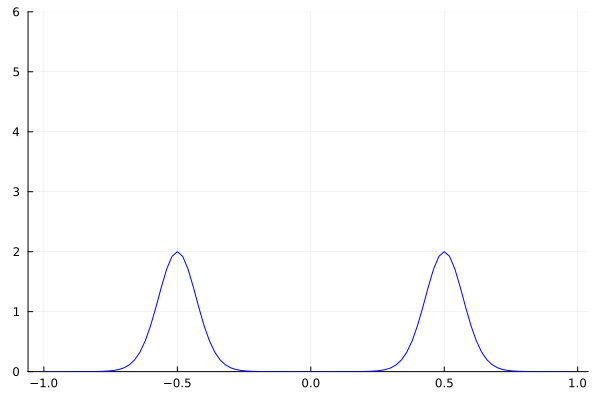

In [9]:
# computational grid = periodic interval [0, 1)
n = 100
Δx = 2/n
xgrid = LinRange(-1,1-Δx,n)

# spatial discretization
D = fdiff2C2(n)             # second partial derivative with respect to spatial variable
γ = 0.1                     # diffusivity

# time stepping (step forward in time with time-step h_t using Forward Euler)
Δt = 0.008                  # time step
σ = γ * Δt / (Δx)^2             
function time_step(D,u1,ht)
    u2 = (I - σ * D) \ u1   # Backward Euler
end

# initial condition
u1 = 2*exp.(-10*cos.(pi*xgrid).^2)

# time stepping gif
anim = Animation()
m = 100                         # number of steps in time 
for k ∈ 1:m                     # animate solution
    plot(xgrid, u1, linecolor = :blue, legend = false)
    ylims!(0.0,6)
    u1 = time_step(D,u1,Δt)
    frame(anim)
end
display(σ)      # print out value of sigma
gif(anim)       # play movie of solution


## Transport

The heat equation on a periodic interval $[-1,1)$ with diffusivity constant $\gamma$ and initial condition $g(x)$ is given by

$$
\partial_t u(x,t) = c\partial_x u(x,t), \qquad u(x,0) = g(x),
$$

where $u$ is $2$-periodic in $x$ and $c>0$ (left-moving transport). We illustrate the stability properties of the forward Euler scheme. 

### Forward Euler

If we combine a forward first-order difference approximation in time with a forward first-order difference approximation in space, then the approximate solution on our computational grid of $n$ equispaced points, at time $t_{j+1}>t_j\geq t_0$ can be computed by (see Lecture 18 notes)
$$
u_{j+1} = (I+\sigma D)u_j, \qquad \text{where} \qquad \sigma = \frac{c\Delta t}{\Delta x}.
$$
Here, $\Delta x$ is the grid spacing, $\Delta t = t_{j+1}-t_j$ is the time step, and $D$ is the periodic first-order forward difference matrix
$$
D=
\begin{pmatrix}
-1 & 1 & & &  \\
 & -1 & 1 & & \\
   &  \ddots & \ddots & \ddots & \\
   & &  & -1 & 1 \\
   1 & & & & -1
\end{pmatrix}.
$$
In Lecture 18, we derived a condition for stability: $0\leq \sigma \leq 1$. Note how *numerical diffusion* affects the solution for $\sigma<1$.

In [11]:
## build differentiation matrix (0=>ones(n) puts length n vector of ones onto the main diagonal, 1=>ones(n-1) puts length n-1 vector of ones onto the first superdiagonal)
function fdiff1C1(n)
    D = diagm(0 => -ones(n), 1 => ones(n-1))
    D[end,1] = 1
    return D
end

# 12 x 12 second-order centered difference matrix
fdiff1C1(12)

12×12 Matrix{Float64}:
 -1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   1.0
  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0

0.5

┌ Info: Saved animation to C:\Users\phros\AppData\Local\Temp\jl_tqh0q0l7sd.gif
└ @ Plots C:\Users\phros\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\phros\\AppData\\Local\\Temp\\jl_tqh0q0l7sd.gif")
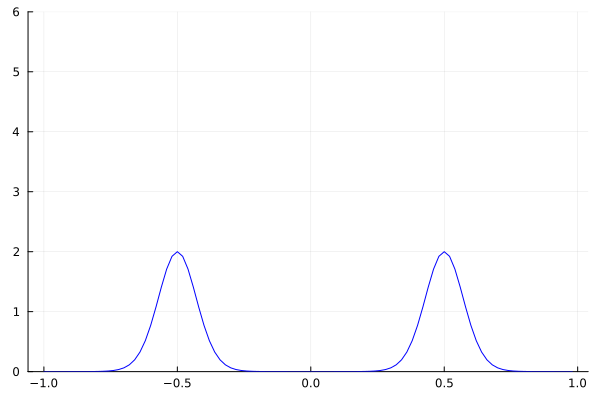

In [19]:
# computational grid = periodic interval [0, 1)
n = 100
Δx = 2/n
xgrid = LinRange(-1,1-Δx,n)

# spatial discretization
D = fdiff1C1(n)             # second partial derivative with respect to spatial variable
c = 1                       # unidirectional wave speed

# time stepping (step forward in time with time-step h_t using Forward Euler)
Δt = 0.01                   # time step
σ = c * Δt / (Δx)           # critical parameter for stability (need <= 1/2)
function time_step(D,u1,ht)
    u2 = (I + σ * D) * u1   # Forward Euler
end

# initial condition
u1 = 2*exp.(-10*cos.(pi*xgrid).^2)

# time stepping gif
anim = Animation()
m = 200                         # number of steps in time 
for k ∈ 1:m                     # animate solution
    plot(xgrid, u1, linecolor = :blue, legend = false)
    ylims!(0.0,6)
    u1 = time_step(D,u1,Δt)
    frame(anim)
end
display(σ)      # print out value of sigma to compare with 0.5 stability criterion
gif(anim)       # play movie of solution
